In [1]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats

import env
import acquireTelco
import prepTelco

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import graphviz
from graphviz import Graph

import sklearn.preprocessing

import acquireZillow

import warnings
warnings.filterwarnings("ignore")

In [2]:
telco_churn = acquireTelco.get_telco_data()
telco_df = telco_churn.copy()

In [3]:
train, validate, test = prepTelco.prep_telco(telco_df, 'churn')

In [4]:
train.columns

Index(['customer_id', 'gender', 'senior_citizen', 'partner', 'dependents',
       'tenure', 'phone_service', 'multiple_lines', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_tv',
       'streaming_movies', 'paperless_billing', 'monthly_charges',
       'total_charges', 'churn', 'contract_type', 'internet_service_type',
       'payment_type', 'is_male', 'has_partner', 'has_dependent',
       'phone_service_Yes', 'multiple_lines_No phone service',
       'multiple_lines_Yes', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No internet service',
       'online_backup_Yes', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No internet service',
       'tech_support_Yes', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No internet service',
       'streaming_movies_Yes', 'paperless_billing_Yes', 'has_churn',
       'contract_type_One year', 'c

In [3]:
def plot_variable_pairs(df):  
    #-----------------
    g = sns.PairGrid(df)
    # we can specify any two functions we want for visualization
    g.map_diag(plt.hist) # single variable
    g.map_offdiag(sns.regplot, scatter_kws={"color": "dodgerblue"}, line_kws={"color": "orange"}) # interaction of two variables
    

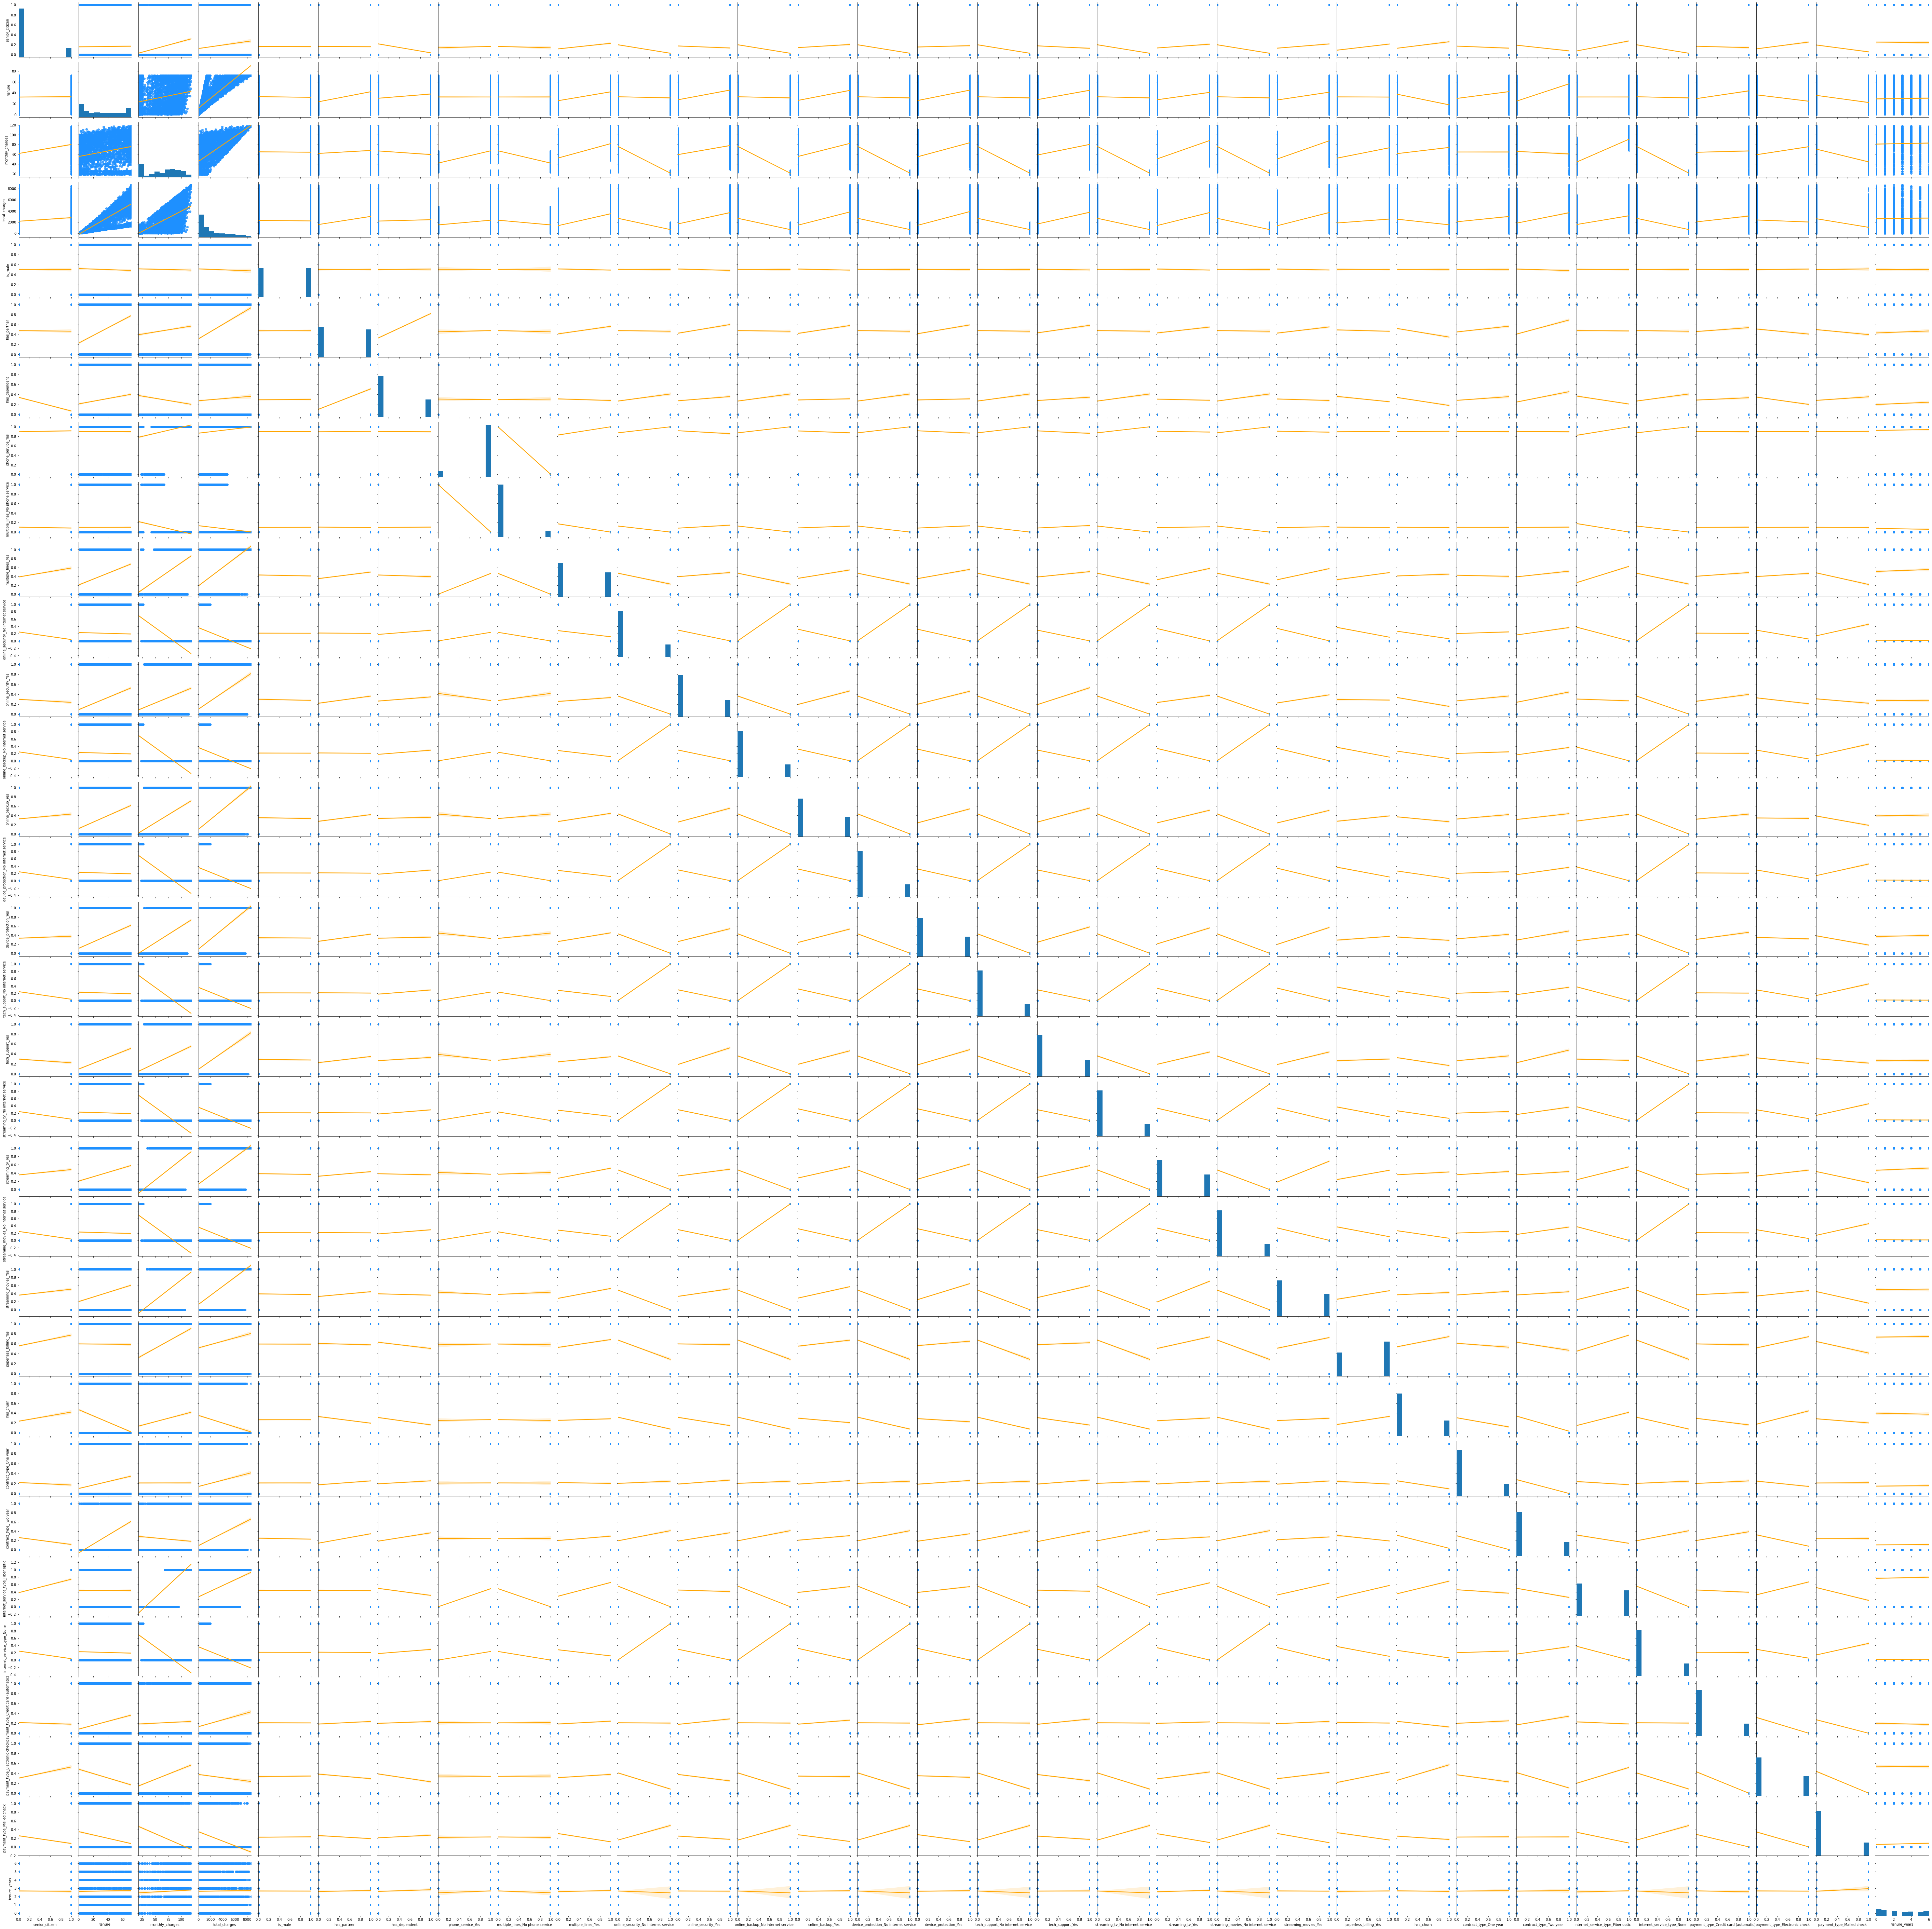

In [12]:
plot_variable_pairs(train)

In [17]:
def months_to_years(df):
    
    df['tenure_years'] = df.tenure / 12
    
    return df

In [18]:
train = months_to_years(train)
train.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,...,paperless_billing_Yes,has_churn,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,tenure_years
5652,3454-JFUBC,Male,1,No,No,68,Yes,No,No internet service,No internet service,...,1,0,0,1,0,1,1,0,0,5.666667
4453,3727-OWVYD,Male,0,No,No,35,Yes,No,Yes,Yes,...,0,0,1,0,0,0,0,0,1,2.916667
4945,5583-EJXRD,Male,0,Yes,Yes,44,No,No phone service,Yes,Yes,...,1,0,0,1,0,0,1,0,0,3.666667
3252,2305-MRGLV,Male,0,Yes,No,28,Yes,No,No,No,...,0,0,0,0,1,0,0,0,0,2.333333
3651,9496-IVVRP,Female,0,Yes,Yes,11,Yes,No,Yes,No,...,0,0,0,0,0,0,0,0,0,0.916667


In [6]:
def plot_categorical_and_continuous_vars(df):
    #the name of the columns that hold the continuous and categorical features and outputs 3 different plots 
    #for visualizing a categorical variable and a continuous variable
    con_cat_features = ['age', 'area', 'bedrooms', 'bathrooms']
    
    for i, col in enumerate(con_cat_features):
        # i starts at 0, but plot should start at 1
        plot_number = i + 1 

        # Create subplot.
        plt.subplot(1, len(cols), plot_number)

        # Title with column name.
        plt.title(col)

        # Scatter Plot
        sns.lmplot(x=taxamount, y=col, data=train, line_kws={'color': 'red'})
        
        # Joint Plot
        sns.jointplot(x= taxamount, y= col , data = train, kind='reg', height=5)
        
        sns.relplot(x = taxamount, y = col, data = train, kind='reg')
        # Hide gridlines.
        plt.grid(False)

        # sets proper spacing between plots
        plt.tight_layout()

    plt.show()
        

In [3]:
from datetime import date


# For zillow data set to create the number of years passed

def yearbuilt_years(df):
    df.year_built =  df.year_built.astype(int)
    year = date.today().year
    df['age'] = year - df.year_built
    # dropping the 'yearbuilt' column now that i have the age
    df = df.drop(columns=['year_built'])
    
    return df

# Exercise Part 2- Exploration 

In [2]:
train, validate, test = acquireZillow.wrangle_zillow()

train.head()

,bedrooms,bathrooms,area,tax_value,taxamount,fips,age
10057,4.0,2.0,1561,248240.0,2504.40,6059.0,48
2004969,3.0,2.0,1770,88390.0,1671.93,6037.0,61
306031,2.0,1.0,1452,81169.0,1310.88,6037.0,75
1038594,3.0,1.0,1000,119174.0,1900.28,6037.0,71
270959,3.0,2.0,1974,432268.0,5315.27,6037.0,33


1) Come up with some initial hypotheses based on your goal of predicting property value.

2) Visualize all combinations of variables in some way.

3) Run the appropriate statistical tests where needed.

4) What independent variables are correlated with the dependent variable, home value?

5) Which independent variables are correlated with other independent variables (bedrooms, bathrooms, year built, square feet)?

6) Make sure to document your takeaways from visualizations and statistical tests as well as the decisions you make throughout your process.

## Hypothesis

1) Does year built affect tax amount?

    Ho = There is no relationship between year built and tax amount
    Ha = There is a relationship between year built and tax amount

2) Does bedroom affect tax amount?

    Ho = There is no relationship between bedroom and tax amount
    Ha = There is a relationship between bedroom and tax amount

3) Does bathrooms affect tax amount ?

    Ho = There is no relationship between bathrooms and tax amount
    Ha = There is a relationship between bathrooms and tax amount

4) Does area affect tax amount?

    Ho = There is no relationship between area and tax amount
    Ha = There is a relationship between area and tax amount

5) Does fips affect tax amount?

    Ho = There is no relationship between fips and tax amount
    Ha = There is a relationship between fips and tax amount

## Visualization Pairplot train-- Zillow Data

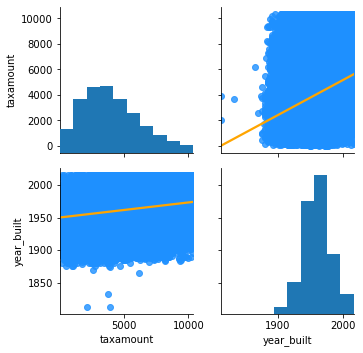

In [23]:
plot_variable_pairs(train[['taxamount', 'age']])

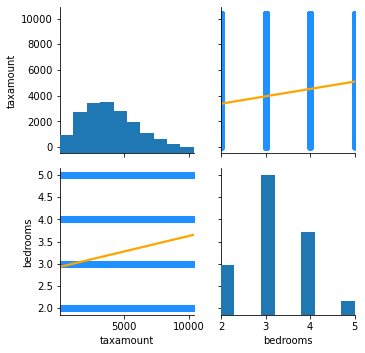

In [8]:
plot_variable_pairs(train[['taxamount', 'bedrooms']])

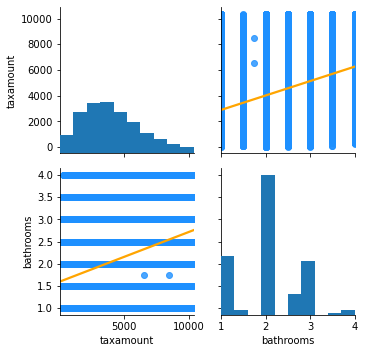

In [9]:
plot_variable_pairs(train[['taxamount', 'bathrooms']])

In [ ]:
plot_variable_pairs(train[['taxamount', 'area']])

In [ ]:
plot_variable_pairs(train[['taxamount', 'fips']])

In [ ]:
plot_categorical_and_continuous_vars(train)

## Stats tests - Zillow Data

In [ ]:
# Testing correlation value and p_value for signifcance for taxamount and age
r, p_value = pearsonr(train.taxamount, train.age)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')


# Testing correlation value and p_value for signifcance for taxamount and bedrooms
r, p_value = pearsonr(train.taxamount, train.bedrooms)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')


# Testing correlation value and p_value for signifcance for taxamount and bathrooms
r, p_value = pearsonr(train.taxamount, train.bathrooms)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')


# Testing correlation value and p_value for signifcance for taxamount and area
r, p_value = pearsonr(train.taxamount, train.area)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')


# Testing correlation value and p_value for signifcance for taxamount and fips
r, p_value = pearsonr(train.taxamount, train.fips)
print(f'Correlation Coefficient: {r}\nP-value: {p_value}')

## Independent Variables-- Correlation

In [ ]:
tax_corr = train.drop(columns=['taxamount', 'tax_value', 'fips']).corr()
tax_corr

## Takeaway